In [197]:
import numpy as np
from functions import sigmoid, softmax, cross_entropy_error

In [216]:
class TwoLayerNN:
    """ a neural network with one hidden layer """
    def __init__(self, X, Y, hidden_size):
        # parameters
        self.X = X
        self.Y = Y
        self.data_num = X.shape[0] # 총 데이터 크기
        self.feature_size = X.shape[1] # X데이터의 크기를 이용해 feature size 추출
        self.output_size = Y.shape[1]  # Y데이터의 크기를 이용해 output size 추출(one-hot encoding 된 라벨 데이터)
        
        """initialize parameters W1, b1, W2, b2"""
        self.params = {}
        # W1, b1 --> hidden layer
        self.params["W1"] = np.random.randn(self.feature_size,hidden_size)
        self.params["b1"] = np.random.randn(hidden_size)
        
        # W2, b2 : hidden layer --> output layer
        self.params["W2"] = np.random.randn(hidden_size, self.output_size)
        self.params["b2"] = np.random.randn(self.output_size)
        
        
    def predict(self,x):
        """ given input x, calculate output using current parameters : W1,b1,W2,b2 """
        # input --> hidden layer
        l1 = np.dot(x,self.params["W1"])+self.params["b1"]
        l1 = sigmoid(l1)
        
        # hidden layer --> output layer
        l2 = np.dot(l1,self.params["W2"])+self.params["b2"]
        self.score = softmax(l2)
        
        return self.score
        
    def loss(self,y,t):
        # loss를 계산
        error = cross_entropy_error(y,t)
        
        return error
    
    def accuracy(self, y, t):
        # 예측값
        predicted = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
 
        # 정확도 계산
        return np.sum(predicted==t)/t.shape[0]
    
    def numerical_gradient(self):
        h=1e-4
        # gradient를 담을 dictionary 생성
        self.gradient = {}
        # parameter들의 gradient 계산 및 저장
        for par, item in self.params.items():
            grad = np.zeros(item.shape)
            # flatten 시켜서 개별 원소들이 idx 값을 가지도록 함
            for idx, i in enumerate(item.flatten()):
                # 만약 벡터 1개로 구성된 parameter 이라면
                if item.shape == item.flatten().shape:
                    self.params[par][idx] = i+h
                    y1 = self.loss(self.predict(self.batch_X),self.batch_Y)
                    self.params[par][idx] = i-h
                    y2 = self.loss(self.predict(self.batch_X),self.batch_Y)
                    grad[idx] = (y1-y2)/(2*h)
                    self.params[par][idx] = i
                    continue
                    
                # 만약 벡터 1개로 구성된 parameter 이라면
                # 해당 idx 으로 실제 numpy 값에서 어떤 위치에 있는지 추출
                row,col = idx//item.shape[1], idx%item.shape[1]
                self.params[par][row,col] = i+h
                y1 = self.loss(self.predict(self.batch_X),self.batch_Y)
                self.params[par][row,col] = i-h
                y2 = self.loss(self.predict(self.batch_X),self.batch_Y)
                grad[row,col] = (y1-y2)/(2*h)
                self.params[par][row,col] = i
                
            # 해당 파라미터의 gradient 저장
            self.gradient[par]=grad
        return self.gradient
        
    def learn(self, lr, epoch, batch_size = 40):
        # input 데이터 수와 설정한 batch_size 수를 비교하여 batch_size 결정
        batch_size = min(batch_size, self.data_num)
        # batch size에 따른 한 epoch 안에서의 반복 횟수
        batch_num = self.data_num // batch_size
        print(batch_num)
        # epoch 당 loss를 담을 list 생성
        self.loss_list = []
        # epoch 당 accuracy를 담을 list 생성
        self.accuracy_list = []
        
        # 총 데이터에 대해 epoch 만큼 반복 학습
        for e in range(epoch):
            # 한 epoch 당 loss & accuracy를 계산
            loss = 0
            accuracy = 0
            for b in range(batch_num):
                # batch size만큼의 batch data 생성
                self.batch_X, self.batch_Y = self.X[batch_size*b:batch_size*(b+1),], self.Y[batch_size*b:batch_size*(b+1),]

                # 해당 batch_size 만큼의 데이터 input 하여 각 label에 대한 score 계산
                score = self.predict(self.batch_X)
                # loss 계산
                l = self.loss(score, self.batch_Y)
                loss+=l
                # accuracy 계산
                a = self.accuracy(score,self.batch_Y)
                accuracy += a
                
                # W update
                gradient = self.numerical_gradient()
       
                for par, item in gradient.items():
                    self.params[par] = self.params[par]-lr*gradient[par]
            # 한 epoch 당 loss 평균
            loss = loss/batch_num
            # 한 epoch 당 accuracy 평균
            accuracy = accuracy/batch_num
            print("Epoch : {:5}, Loss : {:.6f}, Accuracy : {:.4%}".format(e,loss, accuracy))
            self.loss_list.append(loss) 
            self.accuracy_list.append(accuracy) 

In [45]:
# 데이터 로드

from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data # iris data input
y = iris.target # iris target(label)
y_name = iris.target_names # iris target name
label_num = len(y_name) # target 개수
feature_names = iris.feature_names

# import
from sklearn.model_selection import train_test_split
from NeuralNetwork_class import TwoLayerNN

# train,test set 8:2 생성
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

# one_hot encoding
y_train=np.eye(label_num)[y_train] # one_hot encoding
y_test = np.eye(label_num)[y_test] # one_hot encoding

In [223]:
# 클래스 생성
model = TwoLayerNN(X_train,y_train,5) # hidden layer 5

# learning_rate = 0.01, epoch =500, batch_size = 40(클래스에서 디폴트)
model.learn(0.01, 500)

plt.plot(model.loss_list, label = "cost")
plt.plot(model.accuracy_list, label = "accuracy")
plt.legend()

test_accuracy = model.accuracy(model.predict(X_test),y_test)
print("Test Accuracy : {:.4%}".format(test_accuracy))


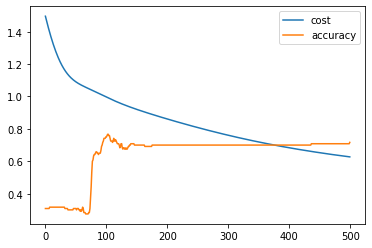

In [218]:
# learning_rate = 0.05, epoch=500, batch_size = 40(클래스에서 디폴트)
model.learn(0.05, 500)

plt.plot(model.loss_list, label = "cost")
plt.plot(model.accuracy_list, label = "accuracy")
plt.legend()

test_accuracy = model.accuracy(model.predict(X_test),y_test)
print("Test Accuracy : {:.4%}".format(test_accuracy))

Test Accuracy : 96.6667%
